In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
%matplotlib ipympl

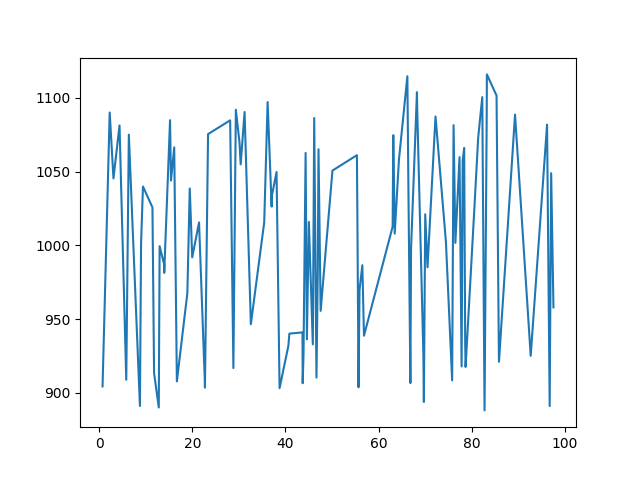

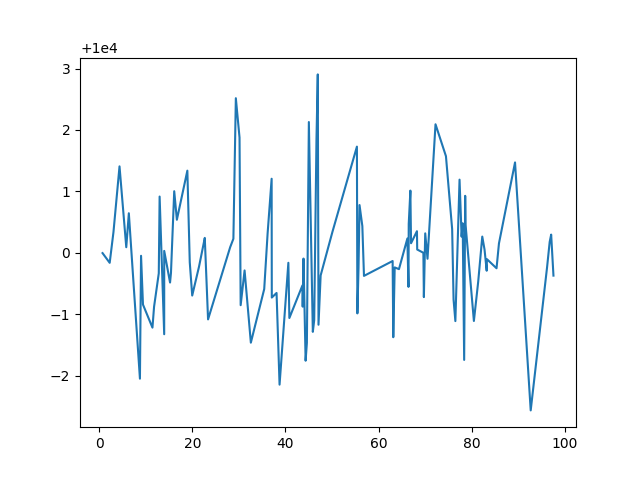

In [69]:
rand = np.random.default_rng(42)
t = 100 * rand.random(100)
t.sort()
snr = 10
y = 100*np.sin(2 * np.pi * t) + 100/snr * rand.standard_normal(100) + 1000 
yc = 1 * rand.standard_normal(100) + 10000
plt.figure()
plt.plot(t,y)
plt.figure()
plt.plot(t,yc)

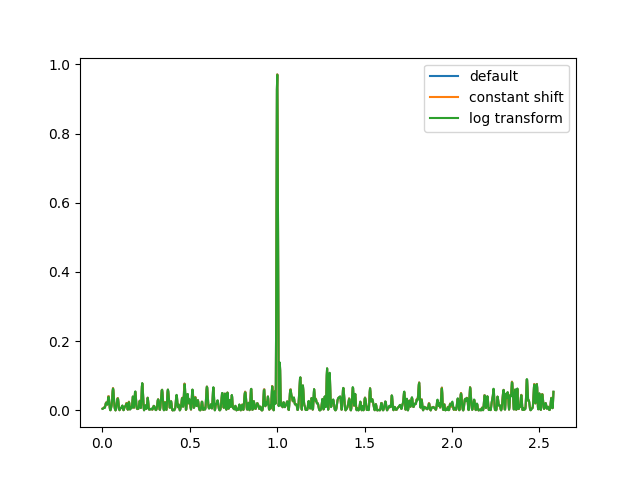

In [70]:
f1, p1 = LombScargle(t, y).autopower()
f2, p2 = LombScargle(t, y-np.mean(y)).autopower()
f3, p3 = LombScargle(t, np.log(y)).autopower()
f4, p4 = LombScargle(t, np.log(y+100)).autopower()


plt.figure()
plt.plot(f1, p1, label='default')
plt.plot(f2, p2, label='constant shift') # vertical shift
plt.plot(f3, p3, label='log transform')
#plt.plot(f4, p4, label='constant shift log transform') # horizontal shift
plt.legend()

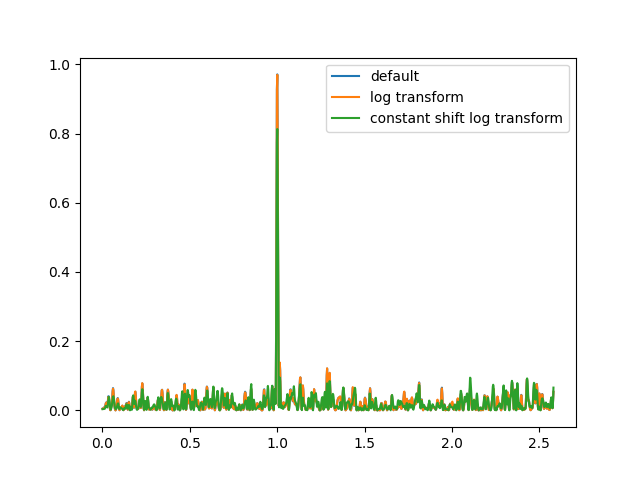

In [72]:
f1, p1 = LombScargle(t, y).autopower()
f2, p2 = LombScargle(t, np.log(y/yc)).autopower()
f3, p3 = LombScargle(t, np.log((y+3000)/yc)).autopower()


plt.figure()
plt.plot(f1, p1, label='default')
plt.plot(f2, p2, label='log transform') # vertical shift
plt.plot(f3, p3, label='constant shift log transform') # horizontal shift
plt.legend()